In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/6000-messengers-reviews-google-play/Training_Data_Google_Play_reviews_6000.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/6000-messengers-reviews-google-play/Training_Data_Google_Play_reviews_6000.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,userLang,app_id
0,495266a4-f451-48c3-a844-fb3c07560d55,Foysal Hossain,https://play-lh.googleusercontent.com/a-/ALV-U...,Gett van for no reason 😂😂😂,1,0,NaN,2023-09-19 15:05:31,NaN,NaN,NaN,EN,org.telegram.messenger
1,947fcd83-7a28-403d-b03b-d0bc20f52e0e,S K VERMA,https://play-lh.googleusercontent.com/a/ACg8oc...,better' than WhatsApp,4,0,NaN,2023-09-19 14:59:30,NaN,NaN,NaN,EN,org.telegram.messenger
2,65856211-67ba-4560-84dd-a0055775ed90,Amanuel Abara,https://play-lh.googleusercontent.com/a/ACg8oc...,That was good app for me,5,0,NaN,2023-09-19 14:55:06,NaN,NaN,NaN,EN,org.telegram.messenger
3,cd5ba250-3a26-43b4-a378-77d18f73a503,Vagarangas X Aopi,https://play-lh.googleusercontent.com/a/ACg8oc...,Love the app,5,0,10.0.4,2023-09-19 14:50:18,NaN,NaN,10.0.4,EN,org.telegram.messenger
4,e8e886b4-d6c6-416b-b0a1-be90320c4024,Shafin islam,https://play-lh.googleusercontent.com/a-/ALV-U...,🕳️🕳️🕳️,1,0,NaN,2023-09-19 14:48:20,NaN,NaN,NaN,EN,org.telegram.messenger


In [5]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               6000 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  4396 non-null   object
 7   at                    6000 non-null   object
 8   replyContent          191 non-null    object
 9   repliedAt             191 non-null    object
 10  appVersion            4396 non-null   object
 11  userLang              6000 non-null   object
 12  app_id                6000 non-null   object
dtypes: int64(2), object(11)
memory usage: 609.5+ KB


In [7]:
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1604
at                         0
replyContent            5809
repliedAt               5809
appVersion              1604
userLang                   0
app_id                     0
dtype: int64

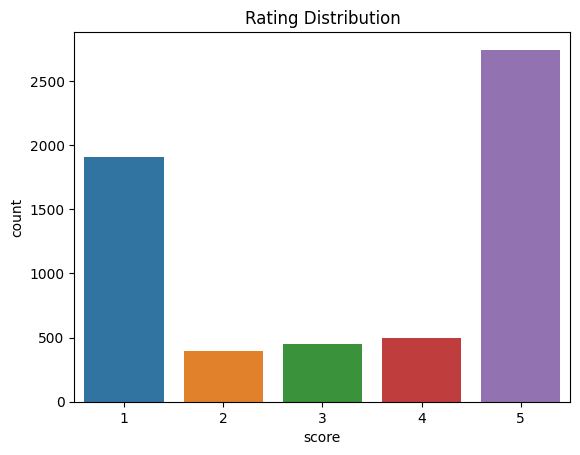

In [8]:
sns.countplot(x='score', data=df)
plt.title("Rating Distribution")
plt.show()

In [9]:
df = df[['content', 'score']].dropna()
df = df[df['score'] != 0]  # remove score 0 if any
df['sentiment'] = df['score'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))
df.head()

,content,score,sentiment
0,Gett van for no reason 😂😂😂,1,negative
1,better' than WhatsApp,4,positive
2,That was good app for me,5,positive
3,Love the app,5,positive
4,🕳️🕳️🕳️,1,negative


In [10]:
import re
df['clean_text'] = df['content'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x.lower()))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

In [12]:
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.77      0.77       432
     neutral       0.00      0.00      0.00        92
    positive       0.80      0.91      0.85       676

    accuracy                           0.79      1200
   macro avg       0.52      0.56      0.54      1200
weighted avg       0.73      0.79      0.76      1200



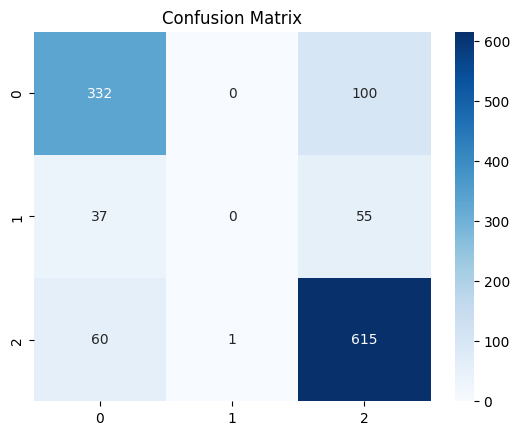

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [17]:
sample = ["Great app, very fast!", "Terrible, always crashes.", "Just okay, nothing special."]
sample_clean = [re.sub(r'[^a-zA-Z ]', '', s.lower()) for s in sample]
sample_vec = tfidf.transform(sample_clean)

model.predict(sample_vec)

array(['positive', 'negative', 'positive'], dtype=object)